<a href="https://colab.research.google.com/github/Bone-Age-Maisha/paper_1/blob/main/Dip4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

hist eqaualization:
2 type : 1) global: whole image consideration  -> averaging them 
            problem : info lost in low amplitude
          2) adaptive : block block devide , each block separately equalized ,block independent ,

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image
import cv2
from matplotlib import pyplot as plt

path = '/content/drive/MyDrive/'
filepath = path + 'apple.jpg'

In [ ]:
img  = cv2.imread(filepath)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img.shape

(1204, 1880, 3)

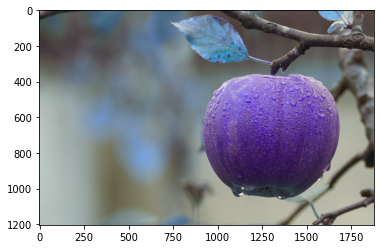

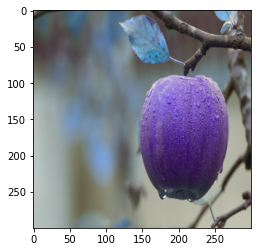

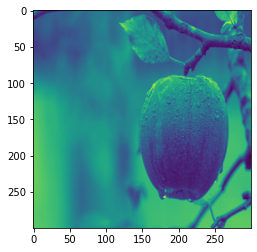

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
dim = (224, 224)
  
# resize image
img1 = cv2.resize(img, (300,300), interpolation = cv2.INTER_AREA)
plt.imshow(img)
plt.show()
plt.imshow(img1)
plt.show()
#display(img.getchannel('G'))
img2 = cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)
plt.imshow(img2)

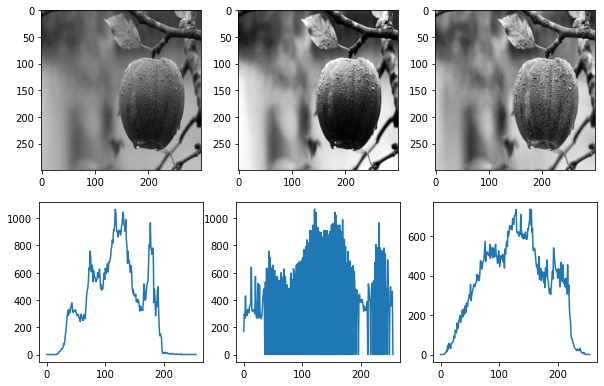

In [ ]:
hist = cv2.calcHist([img2],[0],None,[256],[0,255])

from matplotlib.gridspec import GridSpec
row =3; col=3
fig = plt.figure(figsize=(10,10))  # figure size control size in inch 
gs = GridSpec(row,col)
fig.add_subplot(gs[0 ,0])
plt.imshow(img2, cmap='gray')
fig.add_subplot(gs[1,0])
plt.plot(hist)
img_eqa=cv2.equalizeHist(img2)
fig.add_subplot(gs[0 ,1])
plt.imshow(img_eqa,cmap='gray')
hist1 = cv2.calcHist([img_eqa],[0],None,[256],[0,255])
fig.add_subplot(gs[1,1])
plt.plot(hist1)
cl=cv2.createCLAHE(2.0,(8,8)) # object create
img_adp=cl.apply(img2)
fig.add_subplot(gs[0 ,2])
plt.imshow(img_adp,cmap='gray')
hist2 = cv2.calcHist([img_adp],[0],None,[256],[0,255])
fig.add_subplot(gs[1,2])
plt.plot(hist2)
plt.show()

Global equalization: cause abrupt chage, discrete relation in representation

In [ ]:
#img_eqa=cv2.equalizeHist(img2)
#hist1 = cv2.calcHist([img_eqa],[0],None,[256],[0,255])
#used in above sell

Local equalization
CLAHE -- need to create object , then object used to apply in image

In [ ]:
cl=cv2.createCLAHE(2.0,(8,8)) # object create(grid limit, gride size)
img_adp=cl.apply(img2)
hist2 = cv2.calcHist([img_adp],[0],None,[256],[0,255])

noise : may cause fature reduction; real  world noisy data, denoise data then fit in model, 
1) Noise type:
  a) Gaussian b)random /unifrom  c)solten pipper

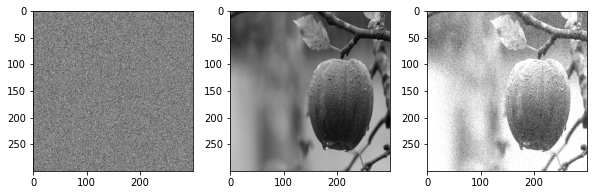

In [ ]:
import numpy as np
img3 =img2
#white image/guassian noise
gn_noise=np.zeros((img2.shape[0],img2.shape[1]),dtype=np.uint8)
cv2.randn(gn_noise,128,20)
#how much include noise
gn_noise=(gn_noise*0.7).astype(np.uint8)
gu_noise=cv2.add(img2,gn_noise)
from matplotlib.gridspec import GridSpec
row =3; col=3
fig = plt.figure(figsize=(10,10))  # figure size control size in inch 
gs = GridSpec(row,col)
fig.add_subplot(gs[0 ,0])
plt.imshow(gn_noise, cmap='gray')
fig.add_subplot(gs[0 ,1])
plt.imshow(img2, cmap='gray')
fig.add_subplot(gs[0 ,2])
plt.imshow(gu_noise, cmap='gray')
plt.show()

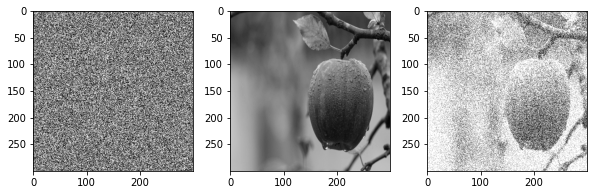

In [ ]:
import numpy as np
img3 =img2
#uniform noise
un_noise=np.zeros((img2.shape[0],img2.shape[1]),dtype=np.uint8)
cv2.randu(un_noise,0,255)
#how much include noise
un_noise=(un_noise*0.7).astype(np.uint8)
uf_noise=cv2.add(img2,un_noise)
from matplotlib.gridspec import GridSpec
row =3; col=3
fig = plt.figure(figsize=(10,10))  # figure size control size in inch 
gs = GridSpec(row,col)
fig.add_subplot(gs[0 ,0])
plt.imshow(un_noise, cmap='gray')
fig.add_subplot(gs[0 ,1])
plt.imshow(img2, cmap='gray')
fig.add_subplot(gs[0 ,2])
plt.imshow(uf_noise, cmap='gray')
plt.show()

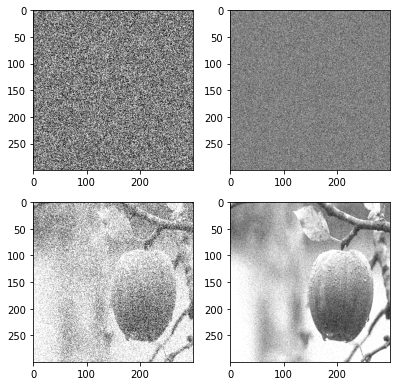

In [ ]:
from matplotlib.gridspec import GridSpec
row =3; col=3
fig = plt.figure(figsize=(10,10))  # figure size control size in inch 
gs = GridSpec(row,col)
fig.add_subplot(gs[0 ,0])
plt.imshow(un_noise, cmap='gray')
fig.add_subplot(gs[0 ,1])
plt.imshow(gn_noise, cmap='gray')
fig.add_subplot(gs[1 ,0])
plt.imshow(uf_noise, cmap='gray')
fig.add_subplot(gs[1 ,1])
plt.imshow(gu_noise, cmap='gray')
plt.show()

salt and pepper

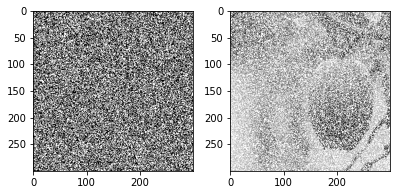

In [ ]:
#from unifom matrix binarization
import numpy as np
img3 =img2
#uniform noise
un_noise2=np.zeros((img2.shape[0],img2.shape[1]),dtype=np.uint8)
cv2.randu(un_noise2,0,255)
#how much include noise
un_noise1=(un_noise2*0.7).astype(np.uint8)
im_n=un_noise2.copy()
ret,im_n=cv2.threshold(im_n,128,255,cv2.THRESH_BINARY)# converting to salt and pepper
uf_noise2=cv2.add(img2,im_n)
from matplotlib.gridspec import GridSpec
row =3; col=3
fig = plt.figure(figsize=(10,10))  # figure size control size in inch 
gs = GridSpec(row,col)
fig.add_subplot(gs[0 ,0])
plt.imshow(im_n, cmap='gray')
fig.add_subplot(gs[0 ,1])
plt.imshow(uf_noise2, cmap='gray')
plt.show()

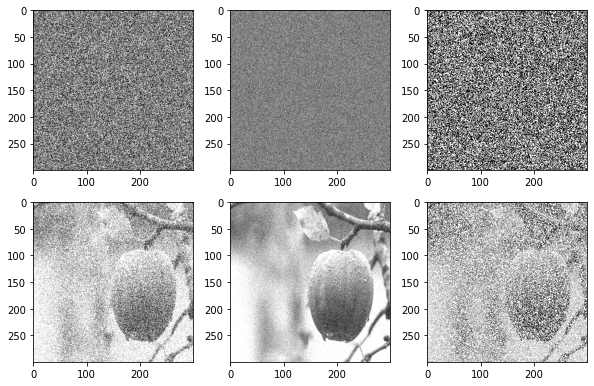

In [ ]:
from matplotlib.gridspec import GridSpec
row =3; col=3
fig = plt.figure(figsize=(10,10))  # figure size control size in inch 
gs = GridSpec(row,col)
fig.add_subplot(gs[0 ,0])
plt.imshow(un_noise, cmap='gray')
fig.add_subplot(gs[0 ,1])
plt.imshow(gn_noise, cmap='gray')
fig.add_subplot(gs[0 ,2])
plt.imshow(im_n, cmap='gray')
fig.add_subplot(gs[1 ,0])
plt.imshow(uf_noise, cmap='gray')
fig.add_subplot(gs[1 ,1])
plt.imshow(gu_noise, cmap='gray')
fig.add_subplot(gs[1 ,2])
plt.imshow(uf_noise2, cmap='gray')
plt.show()

Denoising
Blur - Gausiian


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


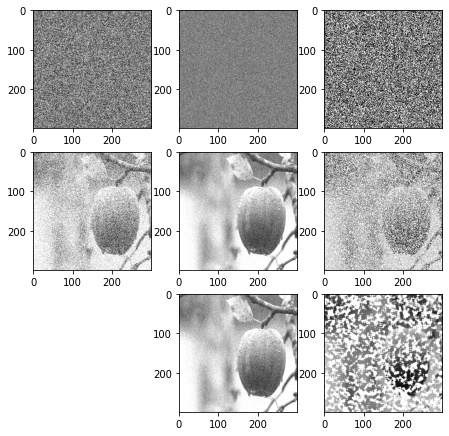

In [ ]:
gu_sm=cv2.GaussianBlur(gu_noise,(5,5),0.1)
#sigmax =horizontal stnd deviation
#can also be used for uniform noise
uf_img=cv2.medianBlur(uf_noise2,7)
from matplotlib.gridspec import GridSpec
row =4; col=4
fig = plt.figure(figsize=(10,10))  # figure size control size in inch 
gs = GridSpec(row,col)
fig.add_subplot(gs[0 ,0])
plt.imshow(un_noise, cmap='gray')
fig.add_subplot(gs[0 ,1])
plt.imshow(gn_noise, cmap='gray')
fig.add_subplot(gs[0 ,2])
plt.imshow(im_n, cmap='gray')
fig.add_subplot(gs[1 ,0])
plt.imshow(uf_noise, cmap='gray')
fig.add_subplot(gs[1 ,1])
plt.imshow(gu_noise, cmap='gray')
fig.add_subplot(gs[1 ,2])
plt.imshow(uf_noise2, cmap='gray')
fig.add_subplot(gs[1 ,0])
plt.imshow(uf_noise, cmap='gray')
fig.add_subplot(gs[2 ,1])
plt.imshow(gu_sm, cmap='gray')
fig.add_subplot(gs[2 ,2])
plt.imshow(uf_img, cmap='gray')

plt.show()